Name-RUGVED THAKARE
ID-2023201049

Ventral Temporal All Features face vs House

In [1]:
pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 8.2 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 13.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [85]:
from nilearn import datasets
subj4 = datasets.fetch_haxby(subjects=[4])

In [86]:
from nilearn.maskers import NiftiMasker
masker = NiftiMasker(mask_img=subj4['mask_vt'][0],
                     standardize="zscore_sample",
                     detrend=True,
                     high_variance_confounds=True)
time_series = masker.fit_transform(subj4['func'][0])


/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [87]:
import pandas as pd
import numpy as np
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "house"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'house'], dtype=object)

(1452, 675)
(216, 675)
(216,)


array(['face', 'house'], dtype=object)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

1.0


In [89]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 10)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 10)
print(condition_mask_train.shape)
print(condition_mask_test.shape)
X_train = time_series[condition_mask_train]
X_test = time_series[condition_mask_test]
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
print(accuracy_score(y_test, predicted))

(1452,)
(1452,)
0.8333333333333334


Accuracy for test chunk 0: 1.0
Accuracy for test chunk 1: 1.0
Accuracy for test chunk 2: 1.0
Accuracy for test chunk 3: 1.0
Accuracy for test chunk 4: 0.9444444444444444
Accuracy for test chunk 5: 1.0
Accuracy for test chunk 6: 1.0
Accuracy for test chunk 7: 1.0
Accuracy for test chunk 8: 1.0
Accuracy for test chunk 9: 0.9444444444444444
Accuracy for test chunk 10: 1.0
Accuracy for test chunk 11: 0.8333333333333334

Mean Accuracy: 0.976851851851852
Standard Deviation: 0.04788926126291018


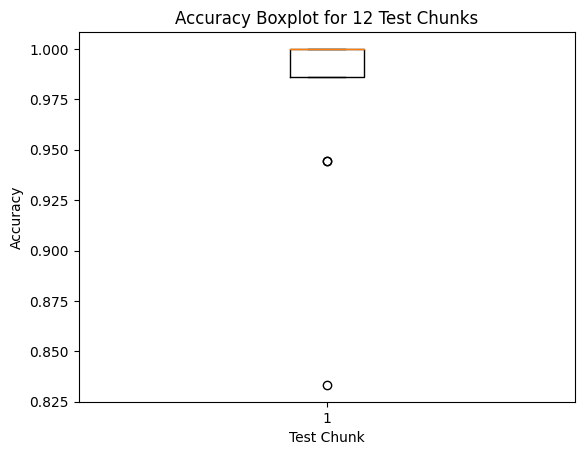

In [90]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()


accuracy_values1 = []


for val in range(12):

    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]


    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values1.append(accuracy)

    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values1)
std_accuracy = np.std(accuracy_values1)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values1)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


Ventral temporal All Features Face vs Scissors


In [91]:
import pandas as pd
import numpy as np
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "scissors"])
condition_mask_array = np.array(condition_mask)
X = time_series[condition_mask_array]
y = conditions[condition_mask]
print(time_series.shape)
print(X.shape)
print(y.shape)
y.unique()
np.array(['face', 'scissors'], dtype=object)

(1452, 675)
(216, 675)
(216,)


array(['face', 'scissors'], dtype=object)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.9583333333333334


In [93]:
condition_mask_train = (condition_mask) & (behavioral["chunks"] <= 6)
condition_mask_test = (condition_mask) & (behavioral["chunks"] > 6)
print(condition_mask_train.shape)
print(condition_mask_test.shape)
X_train = time_series[condition_mask_train]
X_test = time_series[condition_mask_test]
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
print(accuracy_score(y_test, predicted))

(1452,)
(1452,)
0.9666666666666667


Accuracy for test chunk 0: 0.9444444444444444
Accuracy for test chunk 1: 0.9444444444444444
Accuracy for test chunk 2: 1.0
Accuracy for test chunk 3: 1.0
Accuracy for test chunk 4: 1.0
Accuracy for test chunk 5: 0.9444444444444444
Accuracy for test chunk 6: 1.0
Accuracy for test chunk 7: 0.8888888888888888
Accuracy for test chunk 8: 0.8333333333333334
Accuracy for test chunk 9: 1.0
Accuracy for test chunk 10: 0.9444444444444444
Accuracy for test chunk 11: 0.7777777777777778

Mean Accuracy: 0.9398148148148149
Standard Deviation: 0.06975240358018224


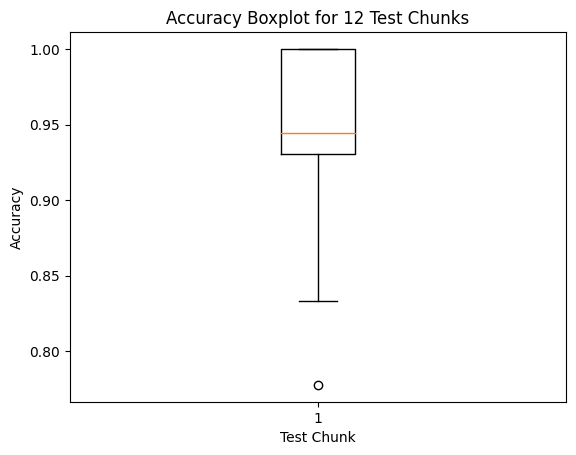

In [94]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svc = LinearSVC()

accuracy_values = []

for val in range(12):

    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = time_series[condition_mask_train]
    X_test_selected = time_series[condition_mask_test]
    y_train_selected = conditions[condition_mask_train]
    y_test_selected = conditions[condition_mask_test]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values.append(accuracy)

    print(f"Accuracy for test chunk {val}: {accuracy}")

mean_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")

plt.boxplot(accuracy_values)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()


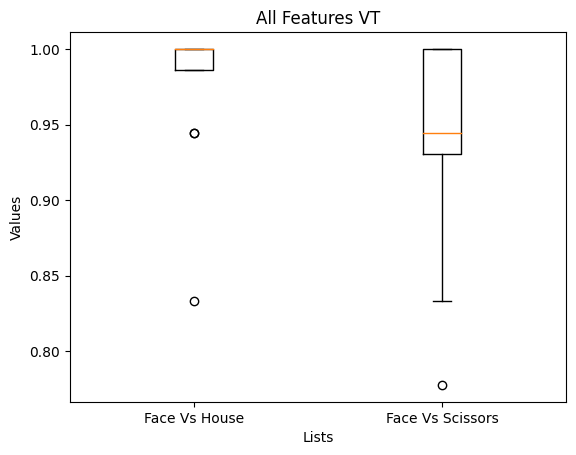

In [96]:
plt.boxplot([accuracy_values1, accuracy_values], labels=['Face Vs House', 'Face Vs Scissors'])

# Add labels and title
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('All Features VT')

# Show the plot
plt.show()